<a href="https://colab.research.google.com/github/SethJorissen/ANM_anomalies_project/blob/main/ANM_anomalies_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANM anomaly detection project

Tsinghua 2023, produced by Aris Dressino and Seth Jorissen

## 1. initial set up

- fetch data for analysis
- import needed libraries

In [ ]:
# fetch phase 1 data from github to colab working directory - run once
# consider using another method if working from local client
%%capture
#import shutil
#shutil.rmtree('/content/phase1')
!apt install subversion
!svn checkout https://github.com/SethJorissen/ANM_anomalies_project/trunk/phase1

In [11]:
# needed libraries
import glob
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
# import train set
# Set the path to the directory containing the CSV files
path = 'phase1/dataset/train/processed'

# Get a list of all CSV files in the directory
files = glob.glob(os.path.join(path, '*.csv'))

df_list = []
# Iterate over each file, read it into a DataFrame, and add a new column with the filename
for file in files:
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file)
    
    # Add a new column with the filename without the extension
    filename = os.path.splitext(os.path.basename(file))[0]
    df['service'] = filename
    df_list.append(df)

# Concatenate all dataframes into a single dataframe
train = pd.concat(df_list, ignore_index=True)

train.head(5)

,timestamp,container_network_receive_packets_dropped.eth0,container_spec_cpu_shares,container_spec_memory_swap_limit_MB,container_fs_writes_MB./dev/vda,container_network_transmit_packets_dropped.eth0,container_network_receive_errors.eth0,container_fs_writes_merged./dev/vda1,container_threads_max,container_fs_write_seconds./dev/vda1,...,container_spec_cpu_period,container_memory_swap,container_threads,container_network_transmit_errors.eth0,container_spec_memory_limit_MB,container_fs_reads_merged./dev/vda1,container_network_transmit_MB.eth0,container_cpu_system_seconds,container_cpu_load_average_10s,service
0,1647619260,0.0,102.0,450.0,0.0,0.0,0.0,0.0,0.0,0.0,...,100000.0,0.0,28.0,0.0,450.0,0.0,1.158048,0.010,0.0,recommendationservice2-0
1,1647619320,0.0,102.0,450.0,0.0,0.0,0.0,0.0,0.0,0.0,...,100000.0,0.0,28.0,0.0,450.0,0.0,1.158673,0.020,0.0,recommendationservice2-0
2,1647619380,0.0,102.0,450.0,0.0,0.0,0.0,0.0,0.0,0.0,...,100000.0,0.0,28.0,0.0,450.0,0.0,1.159907,0.015,0.0,recommendationservice2-0
3,1647619440,0.0,102.0,450.0,0.0,0.0,0.0,0.0,0.0,0.0,...,100000.0,0.0,28.0,0.0,450.0,0.0,1.160313,0.010,0.0,recommendationservice2-0
4,1647619500,0.0,102.0,450.0,0.0,0.0,0.0,0.0,0.0,0.0,...,100000.0,0.0,28.0,0.0,450.0,0.0,1.158043,0.010,0.0,recommendationservice2-0


##2. Exploratory data analysis

- provide summary statistics and relevant analysis of the data
- plot relevant features of the dataset



In [15]:
# describe numerical metrics of train dataset
train.describe()

,timestamp,container_network_receive_packets_dropped.eth0,container_spec_cpu_shares,container_spec_memory_swap_limit_MB,container_fs_writes_MB./dev/vda,container_network_transmit_packets_dropped.eth0,container_network_receive_errors.eth0,container_fs_writes_merged./dev/vda1,container_threads_max,container_fs_write_seconds./dev/vda1,...,container_cpu_cfs_periods,container_spec_cpu_period,container_memory_swap,container_threads,container_network_transmit_errors.eth0,container_spec_memory_limit_MB,container_fs_reads_merged./dev/vda1,container_network_transmit_MB.eth0,container_cpu_system_seconds,container_cpu_load_average_10s
count,6.043800e+04,60438.0,57560.000000,57560.000000,57560.0,60438.0,60438.0,57560.0,57560.0,57560.0,...,57560.000000,57560.0,57560.0,57560.000000,60438.0,57560.000000,57560.0,60438.000000,57560.000000,57560.0
mean,1.647662e+09,0.0,206.700000,368.125000,0.0,0.0,0.0,0.0,0.0,0.0,...,113.878423,100000.0,0.0,25.588870,0.0,368.125000,0.0,1.341939,0.060221,0.0
std,2.492441e+04,0.0,95.695972,280.152678,0.0,0.0,0.0,0.0,0.0,0.0,...,97.499338,0.0,0.0,4.989798,0.0,280.152678,0.0,1.425130,0.100049,0.0
min,1.647619e+09,0.0,102.000000,128.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,100000.0,0.0,15.000000,0.0,128.000000,0.0,0.049372,0.000000,0.0
25%,1.647641e+09,0.0,102.000000,224.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,25.000000,100000.0,0.0,21.000000,0.0,224.000000,0.0,0.381905,0.010000,0.0
50%,1.647662e+09,0.0,204.000000,256.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,98.000000,100000.0,0.0,27.000000,0.0,256.000000,0.0,0.939109,0.025000,0.0
75%,1.647684e+09,0.0,204.000000,465.500000,0.0,0.0,0.0,0.0,0.0,0.0,...,174.000000,100000.0,0.0,29.000000,0.0,465.500000,0.0,1.738056,0.055000,0.0
max,1.647706e+09,0.0,409.000000,1025.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,506.000000,100000.0,0.0,41.000000,0.0,1025.000000,0.0,8.847941,0.670000,0.0


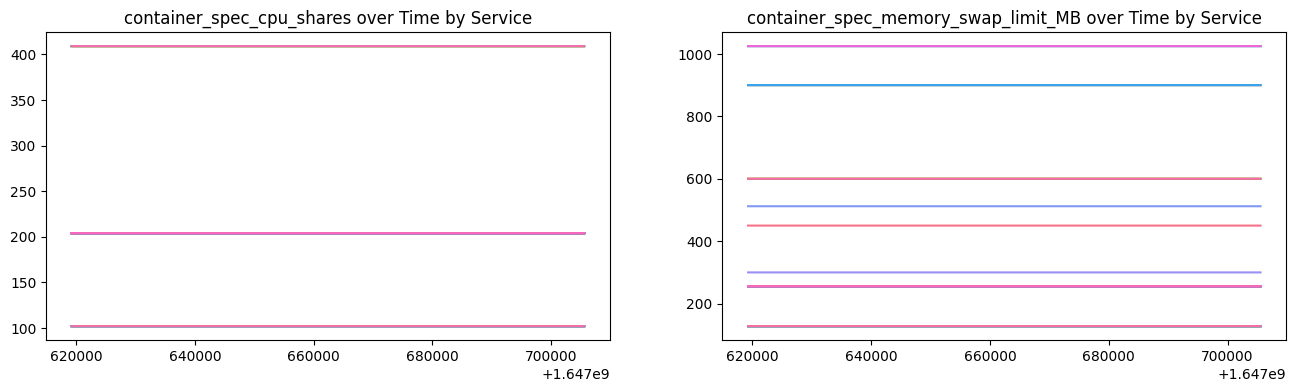

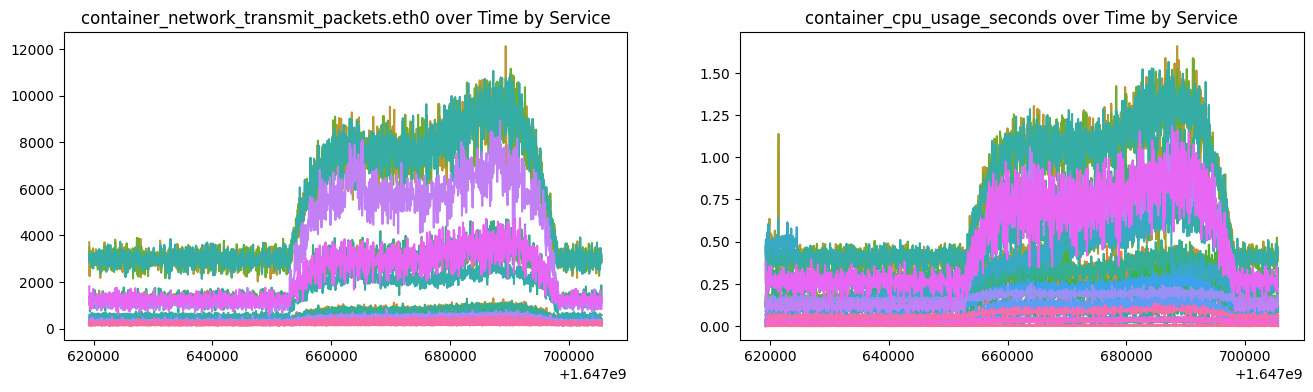

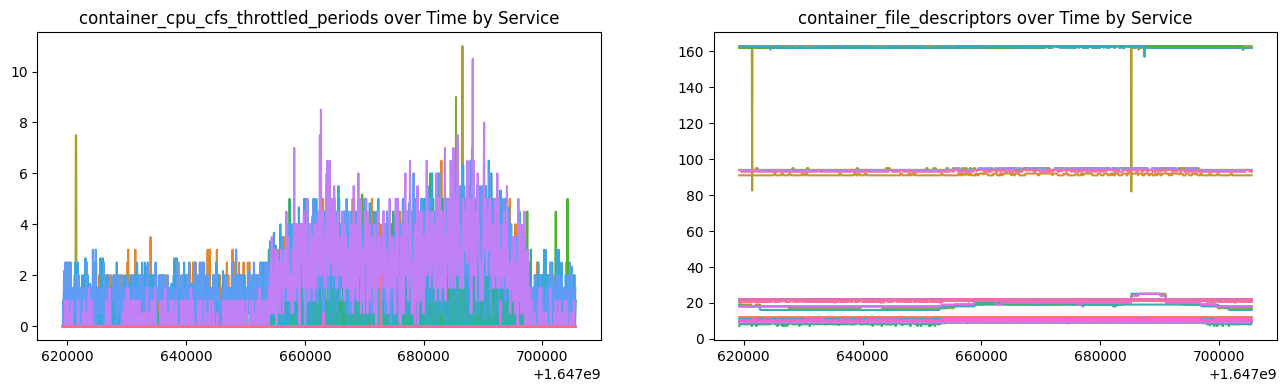

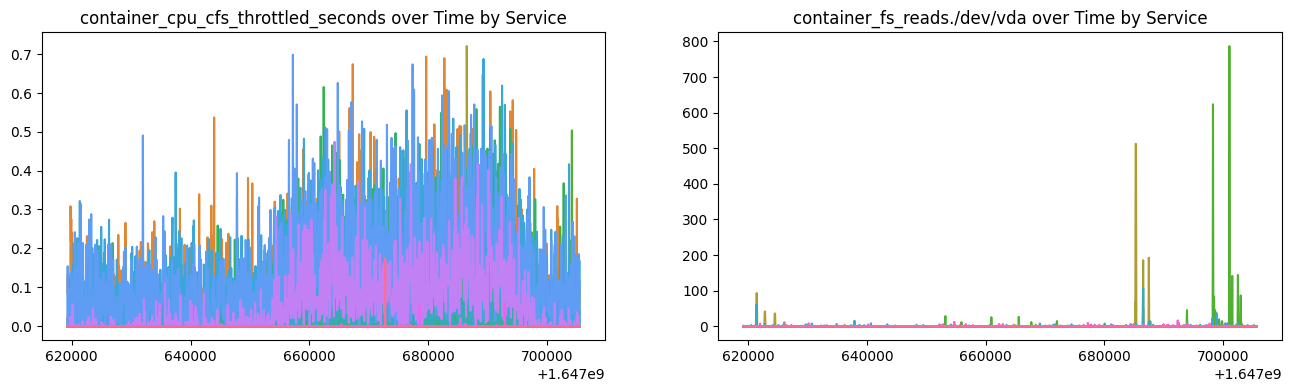

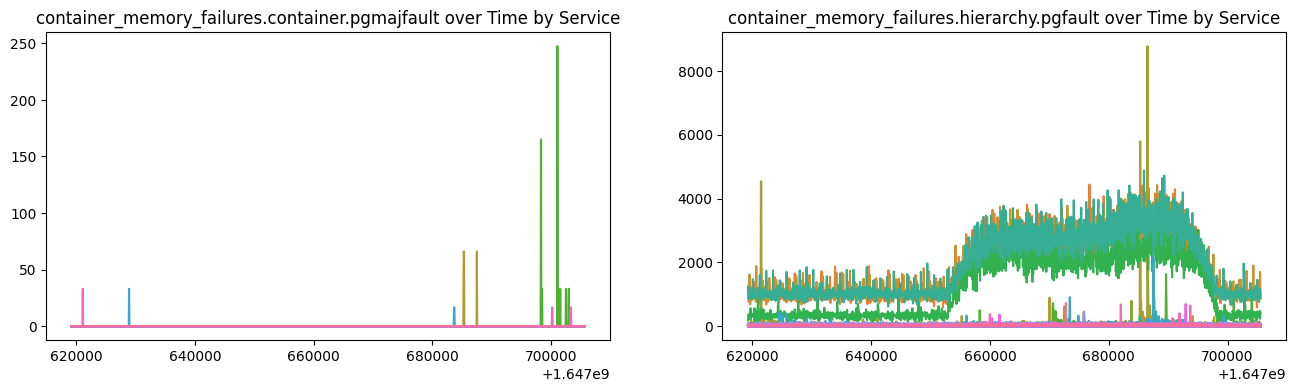

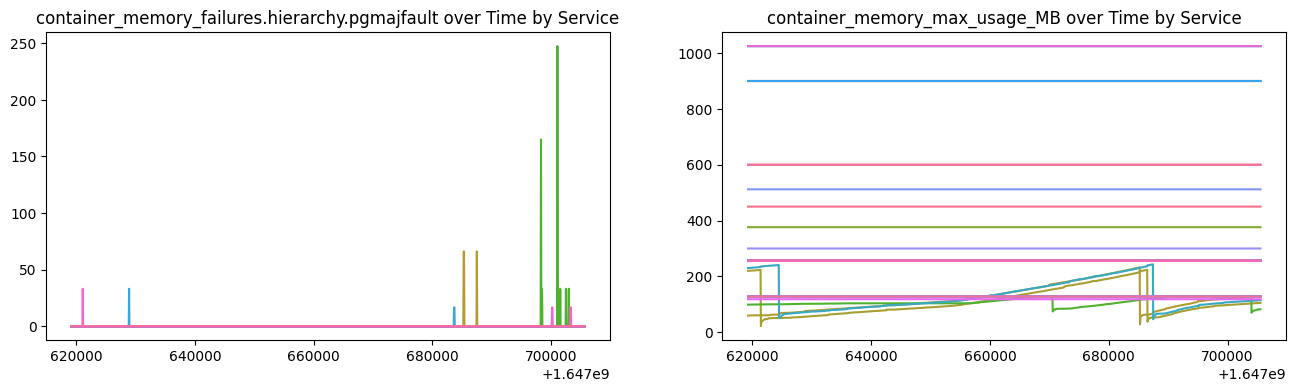

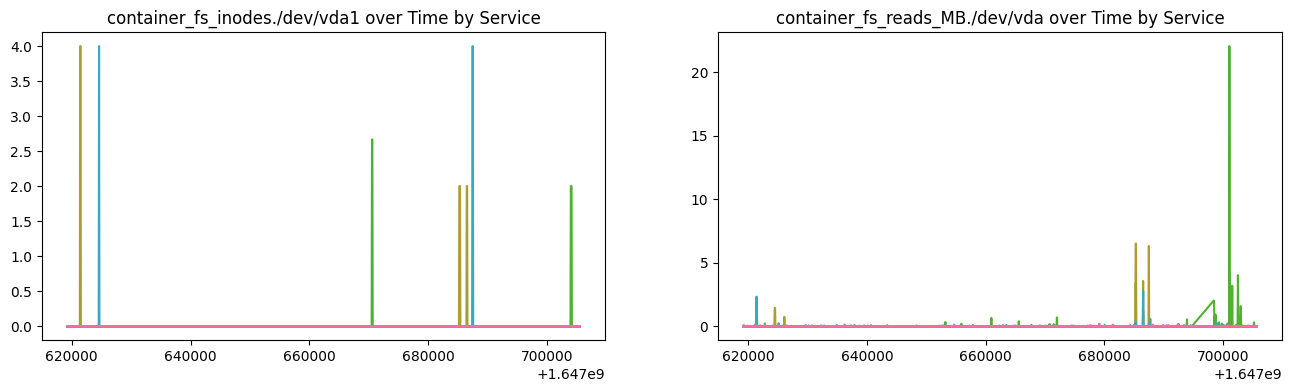

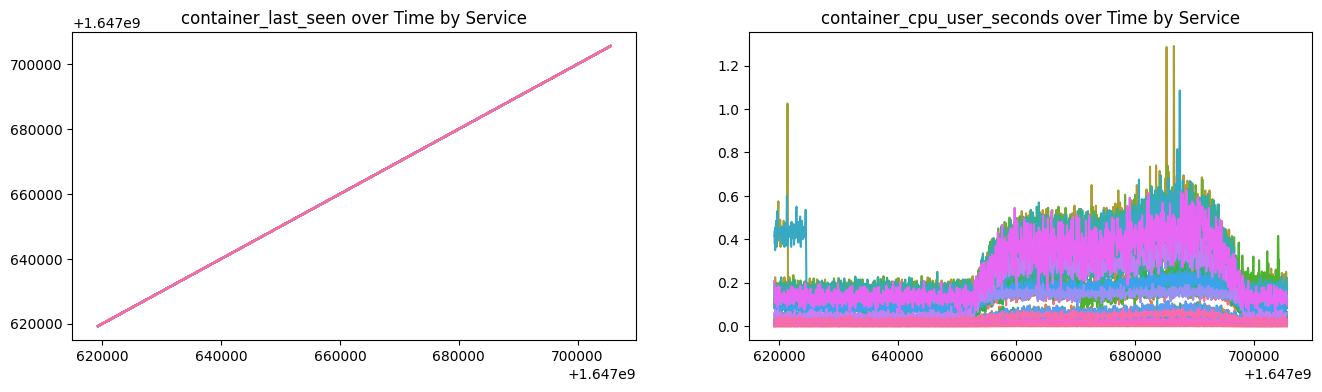

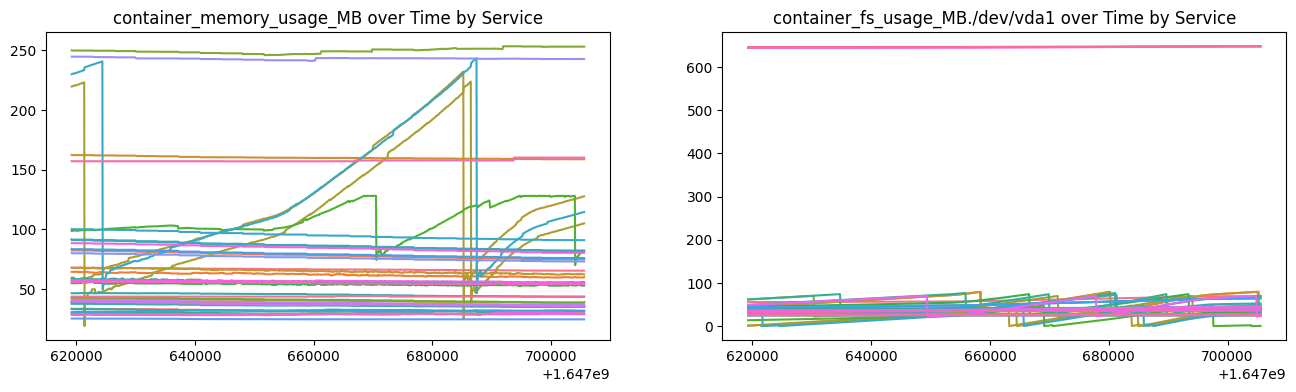

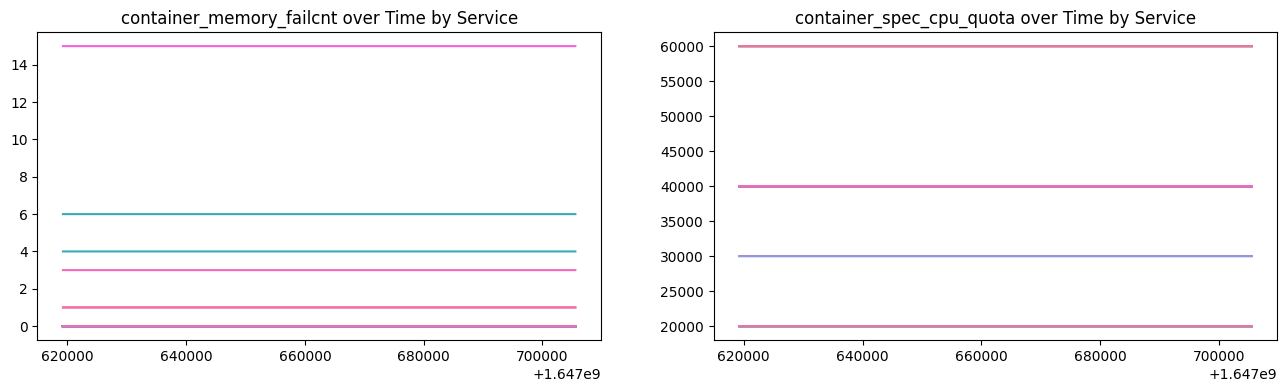

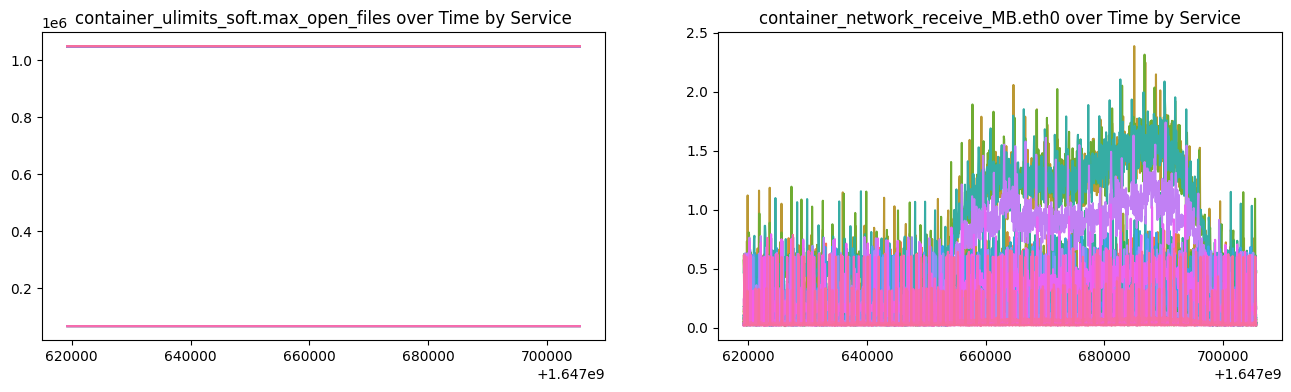

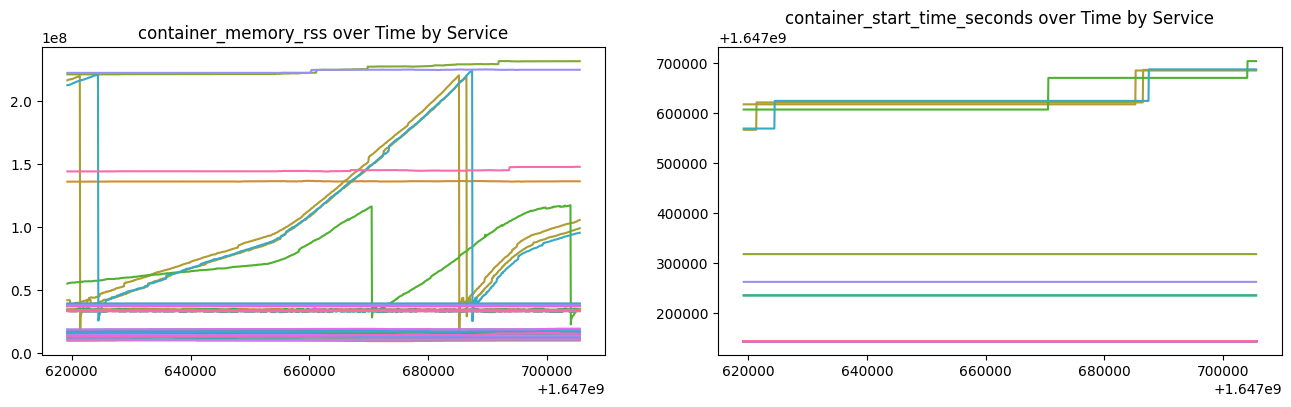

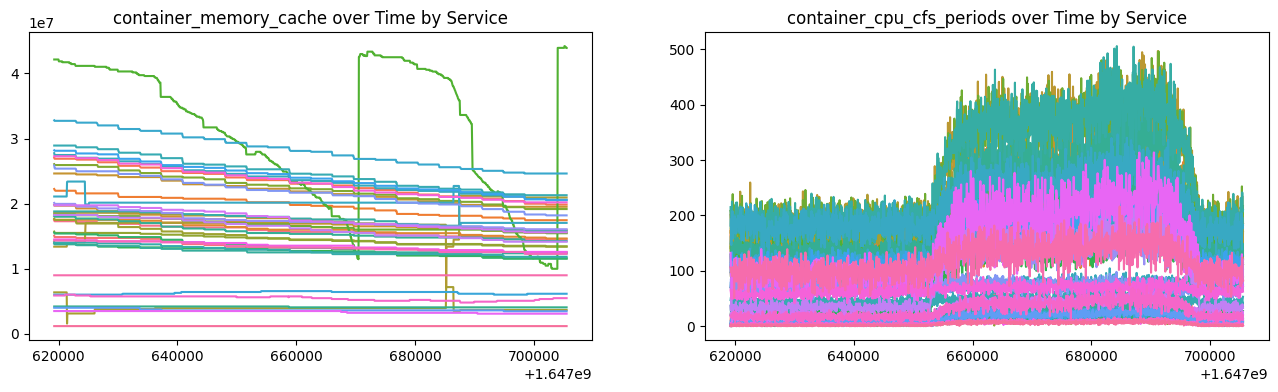

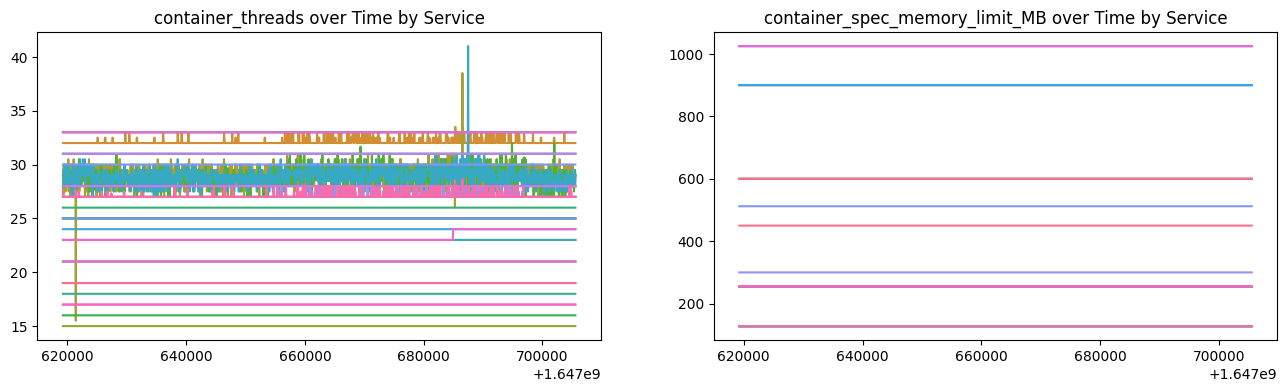

In [35]:
# Loop over all columns in the DataFrame except "timestamp" and "service"
cols = train.columns.drop(["timestamp", "service"])
for i in range(0, len(cols), 2):
    col1 = cols[i]
    col2 = cols[i+1] if i+1 < len(cols) else None

    # Check if all values in the column are 0 or the same value
    if (len(train[col1].unique()) == 1 or train[col1].sum() == 0) or (not col2 or (len(train[col2].unique()) == 1 or train[col2].sum() == 0)):
        continue

    # Check if the values are equal when grouped by service for both columns
    if col2:
        grouped1 = train.groupby('service')[col1].nunique()
        grouped2 = train.groupby('service')[col2].nunique()
        if len(grouped1.unique()) == 1 or len(grouped2.unique()) == 1:
            continue
        
    # Create a new row of subplots with 2 columns
    fig, axs = plt.subplots(1, 2, figsize=(16, 4))

    # Create the first plot in the left column
    sns.lineplot(x="timestamp", y=col1, hue="service", data=train, ax=axs[0])
    axs[0].set_title(f"{col1} over Time by Service")

    # Remove the legend from the first plot
    axs[0].get_legend().remove()

    # Create the second plot in the right column if there is a second column
    if col2:
        sns.lineplot(x="timestamp", y=col2, hue="service", data=train, ax=axs[1])
        axs[1].set_title(f"{col2} over Time by Service")

        # Remove the legend from the second plot
        axs[1].get_legend().remove()

    # Remove axis labels from all subplots
    for ax in axs:
        ax.set_xlabel('')
        ax.set_ylabel('')

    # Set the height of all subplots to the same value
    fig.subplots_adjust(hspace=0.4)

    # Add a border to the row of subplots
    for ax in axs:
        ax.spines['top'].set_visible(True)
        ax.spines['right'].set_visible(True)

    # Show the row of subplots
    plt.show()



##3. Anomaly Detection Model

- train the selected model
- provide metrics design

##4. evaluation, prediction and metrics

- evaluate test set predictions
- define KPIs and relevant metrics
- create info-dashboard explaining the findings

In [ ]:
#test datasets will need to be tested in loop via anomaly detection model
#label.json will be use in every loop by index to verify the prediction
#code in src folder can be used as initial template (?)